# 안녕하세요:)

## AIVLE 1차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [47]:
import pandas as pd

In [48]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [49]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [50]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [51]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')
df_seoul_business = pd.read_csv('df_seoul_business.csv', sep=",", encoding = 'UTF-8')
df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')

In [52]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

In [53]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

In [54]:
df = pd.merge(standard,df_seoul_people,how='inner', on='자치구')
df = pd.merge(df,df_seoul_business,how='inner', on='자치구')
df = pd.merge(df,df_seoul_bus_station,how='inner', on='자치구')
df = pd.merge(df,df_seoul_moving,how='inner', on='도착 시군구 코드')

---

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

*정해진게 없나요? - 라벨을 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
*가설마다 라벨데이터가 달라도 상관없나요? 네 상관없습니다.
*가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

## 가설을 설정해 봅시다(최소 1개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

### 가설 1 : 이동 인구 수가 많으면 정류장 수도 많이 필요할 것이다.
### 가설 2 : 학원 수가 많으면 정류장 수도 많이 필요할 것이다.
### 가설 3 : 승차 총 승객 수 및 하차 총 승객 수는 정류장 수에 영향을 미칠 것이다.
### 가설 4 : 한식 일반 음식점, 커피전문점, 기타주점업은 정류장 및 노선 수에 영향을 미칠 것이다.
### 가설 5 : 택시 종사자의 수가 많으면 이동 인구가 많을 것이고 정류장 수에 영향을 미칠 것이다.
### 가설 6 : 지역 인구 당 정류장 수(합계/정류장 수)는 노선 수에 영향을 줄 것이다


# 1. 조원준(조장) 에이블러님 정리

In [55]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as spst

# 경고문 무시 설정
import warnings
warnings.filterwarnings('ignore')

In [56]:
plt.rc('font', family='nanum')
sns.set(font="Malgun Gothic",
        rc={"axes.unicode_minus":False},
        style='darkgrid')   

In [57]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [58]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')
df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')
df_seoul_business = pd.read_csv('df_seoul_business.csv', sep=",", encoding = 'UTF-8')

In [59]:
df = pd.merge(standard, df_seoul_people,how='inner', on='자치구')
df = pd.merge(df, df_seoul_business,how='inner', on='자치구')
df = pd.merge(df, df_seoul_bus_station,how='inner', on='자치구')
df = pd.merge(df, df_seoul_moving,how='inner', on='도착 시군구 코드')

In [60]:
df.shape

(100, 38)

In [61]:
df.head()

,도착 시군구 코드,자치구,남자,여자,합계,65세 이상,택시운송업,택시운송업.1,한식 일반 음식점업,한식 일반 음식점업.1,...,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,나이,65세 이상 이동 인구
0,11010,종로구,71890,78563,150453,28764,215,215,1548,5912,...,4500874,4348356,123.298104,119.119987,60.151307,41.911289,29075578,20258827.46,65,33818
1,11010,종로구,71890,78563,150453,28764,215,215,1548,5912,...,4500874,4348356,123.298104,119.119987,60.151307,41.911289,29075578,20258827.46,70,26200
2,11010,종로구,71890,78563,150453,28764,215,215,1548,5912,...,4500874,4348356,123.298104,119.119987,60.151307,41.911289,29075578,20258827.46,75,20342
3,11010,종로구,71890,78563,150453,28764,215,215,1548,5912,...,4500874,4348356,123.298104,119.119987,60.151307,41.911289,29075578,20258827.46,80,16148
4,11020,중구,63495,68298,131793,25920,230,235,1588,6414,...,3138112,3050645,113.699710,110.530616,58.450528,44.128266,28733286,21692705.49,65,34257


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   도착 시군구 코드          100 non-null    int64  
 1   자치구                100 non-null    object 
 2   남자                 100 non-null    int64  
 3   여자                 100 non-null    int64  
 4   합계                 100 non-null    int64  
 5   65세 이상             100 non-null    int64  
 6   택시운송업              100 non-null    int64  
 7   택시운송업.1            100 non-null    int64  
 8   한식 일반 음식점업         100 non-null    int64  
 9   한식 일반 음식점업.1       100 non-null    int64  
 10  용달 화물자동차 운송업       100 non-null    int64  
 11  용달 화물자동차 운송업.1     100 non-null    int64  
 12  부동산 중개 및 대리업       100 non-null    int64  
 13  부동산 중개 및 대리업.1     100 non-null    int64  
 14  두발미용업              100 non-null    int64  
 15  두발미용업.1            100 non-null    int64  
 16  커피전문점              100 non-

In [63]:
df.describe(include='all')

,도착 시군구 코드,자치구,남자,여자,합계,65세 이상,택시운송업,택시운송업.1,한식 일반 음식점업,한식 일반 음식점업.1,...,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,나이,65세 이상 이동 인구
count,100.000000,100,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,100.000000,100.000000
unique,NaN,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,종로구,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,11130.000000,NaN,185977.84000,199574.120000,385551.960000,69747.840000,1887.040000,3068.040000,1169.000000,4007.320000,...,4.110994e+06,4.029876e+06,107.525945,105.372406,64.262511,47.605192,2.762930e+07,2.100957e+07,72.500000,20199.330000
std,72.474308,NaN,59630.20591,64379.784579,123832.161402,20988.924661,1133.310356,1933.186107,392.205368,2100.165837,...,1.141216e+06,1.121219e+06,15.005367,14.754595,4.176839,13.680877,3.665977e+06,8.533010e+06,5.618332,7321.574131
min,11010.000000,NaN,63495.00000,68298.000000,131793.000000,25920.000000,215.000000,215.000000,672.000000,2009.000000,...,2.365355e+06,2.331836e+06,79.082866,77.969784,58.450528,30.076522,1.996610e+07,8.908425e+06,65.000000,6146.000000
25%,11070.000000,NaN,149675.00000,159819.000000,309494.000000,57895.000000,1119.000000,1838.000000,867.000000,2663.000000,...,3.200879e+06,3.155827e+06,95.578543,92.738804,60.975391,38.834441,2.572271e+07,1.631436e+07,68.750000,14413.500000
50%,11130.000000,NaN,189462.00000,202091.000000,389714.000000,70436.000000,1713.000000,2589.000000,991.000000,2987.000000,...,4.125466e+06,3.979142e+06,108.467845,108.267985,64.032968,42.697635,2.727945e+07,1.851737e+07,72.500000,19852.500000
75%,11190.000000,NaN,223330.00000,237081.000000,463318.000000,82984.000000,2757.000000,4850.000000,1411.000000,4705.000000,...,4.746623e+06,4.744766e+06,119.962938,117.447907,67.409332,51.623977,2.907558e+07,2.338633e+07,76.250000,26026.000000


In [64]:
df.columns

Index(['도착 시군구 코드', '자치구', '남자', '여자', '합계', '65세 이상', '택시운송업', '택시운송업.1',
       '한식 일반 음식점업', '한식 일반 음식점업.1', '용달 화물자동차 운송업', '용달 화물자동차 운송업.1',
       '부동산 중개 및 대리업', '부동산 중개 및 대리업.1', '두발미용업', '두발미용업.1', '커피전문점',
       '커피전문점.1', '남녀용 겉옷 및 셔츠 도매업', '남녀용 겉옷 및 셔츠 도매업.1', '기타주점업', '기타주점업.1',
       '일반 교과 학원', '일반 교과 학원.1', '한식 육류요리 전문점', '한식 육류요리 전문점.1', '정류장수', '노선수',
       '승차총승객수', '하차총승객수', '승차평균승객수', '하차평균승객수', '평균 이동 시간(분)', '이동인구(합)',
       '총 이동 시간', '총 이동인구', '나이', '65세 이상 이동 인구'],
      dtype='object')

In [65]:
df.columns

Index(['도착 시군구 코드', '자치구', '남자', '여자', '합계', '65세 이상', '택시운송업', '택시운송업.1',
       '한식 일반 음식점업', '한식 일반 음식점업.1', '용달 화물자동차 운송업', '용달 화물자동차 운송업.1',
       '부동산 중개 및 대리업', '부동산 중개 및 대리업.1', '두발미용업', '두발미용업.1', '커피전문점',
       '커피전문점.1', '남녀용 겉옷 및 셔츠 도매업', '남녀용 겉옷 및 셔츠 도매업.1', '기타주점업', '기타주점업.1',
       '일반 교과 학원', '일반 교과 학원.1', '한식 육류요리 전문점', '한식 육류요리 전문점.1', '정류장수', '노선수',
       '승차총승객수', '하차총승객수', '승차평균승객수', '하차평균승객수', '평균 이동 시간(분)', '이동인구(합)',
       '총 이동 시간', '총 이동인구', '나이', '65세 이상 이동 인구'],
      dtype='object')

## **가설**

* 지역 인구 당 정류장 수(합계/정류장 수)는 노선수에 영향을 줄 것이다.

## **단변량 분석**

* 합계, 정류장수, 정류장당 인구수, 노선수 단변량 분석

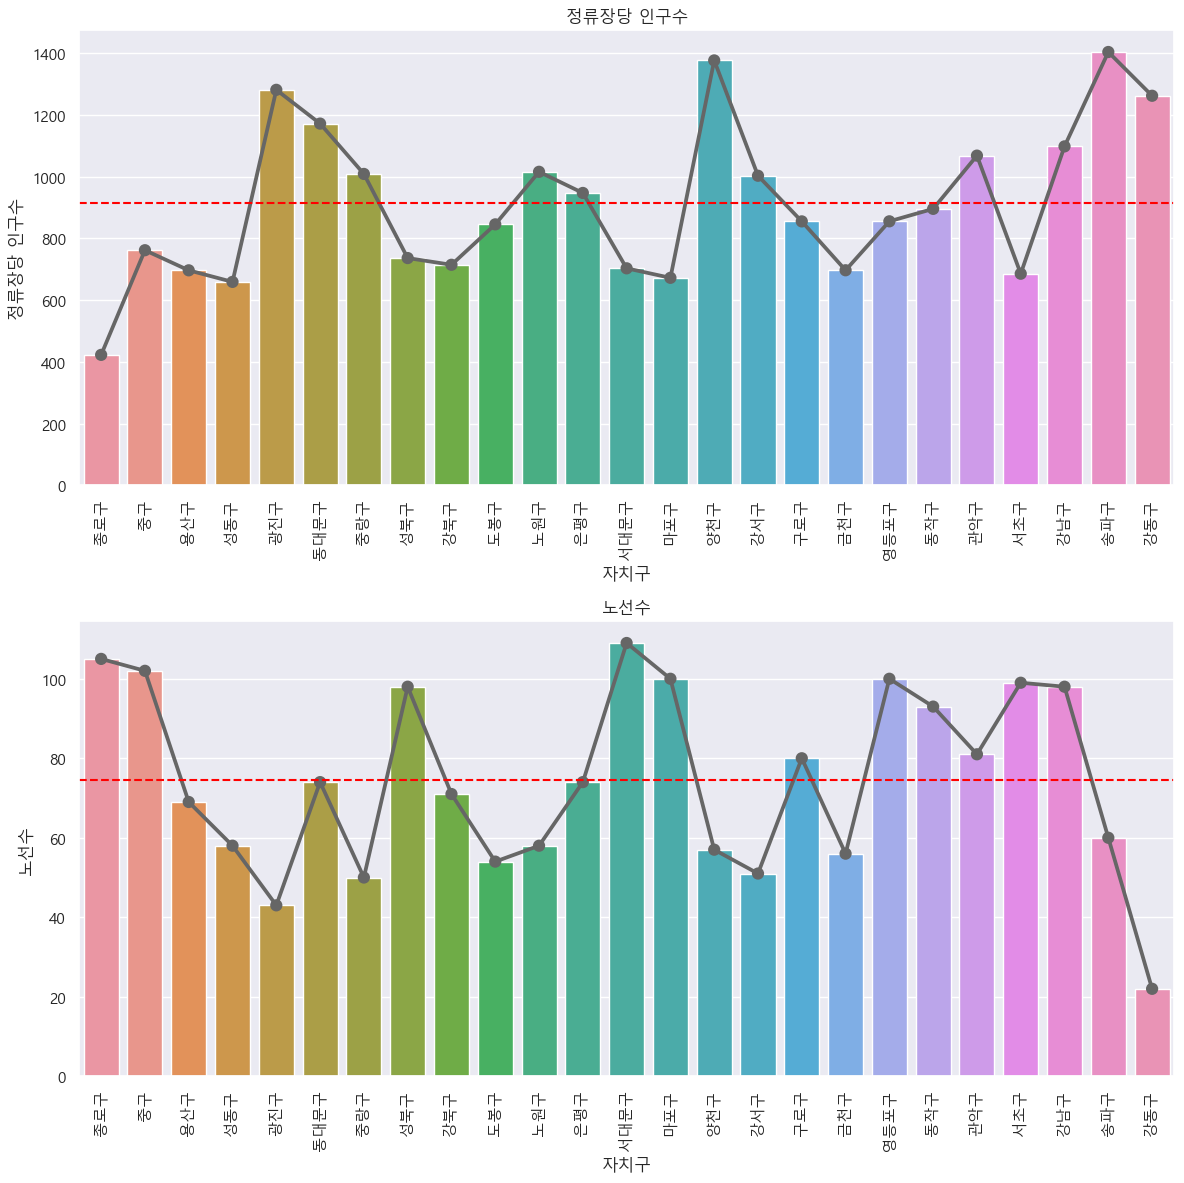

In [66]:
df['정류장당 인구수'] = df['합계'] / df['정류장수']

plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
sns.barplot(x='자치구', y='정류장당 인구수', data=df)
sns.pointplot(x='자치구', y='정류장당 인구수', data=df, ci='sd', color='#666', estimator='mean')
plt.axhline(df['정류장당 인구수'].mean(), color='red', linestyle='--')
plt.xlabel('자치구')
plt.ylabel('정류장당 인구수')
plt.title('정류장당 인구수')
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)
sns.barplot(x='자치구', y='노선수', data=df)
sns.pointplot(x='자치구', y='노선수', data=df, ci='sd', color='#666', estimator='mean')
plt.axhline(df['노선수'].mean(), color='red', linestyle='--')
plt.xlabel('자치구')
plt.ylabel('노선수')
plt.title('노선수')
plt.xticks(rotation=90)

plt.tight_layout()

plt.show()

* 정류장당 인구수
    * `송파구` > `양천구` > `강동구` > ... > 마포구 > 성동구 > 종로구
* 노선수
    * 서대문구 > 종로구 > 중구 > ... > `중량구` > `광진구` > `강동구`
<hr>
* 정류장당 인구수가 가장 많은 `송파구`, `양천구`, `강동구`에 노선을 추가하는 것이 좋아 보인다.
* 노선 수가 가장 적은 `강동구`, `광진구`, `중량구`에 노선을 추가하는 것이 좋아 보인다.


## **이변량 분석**

* 정류장당 인구수, 노선수

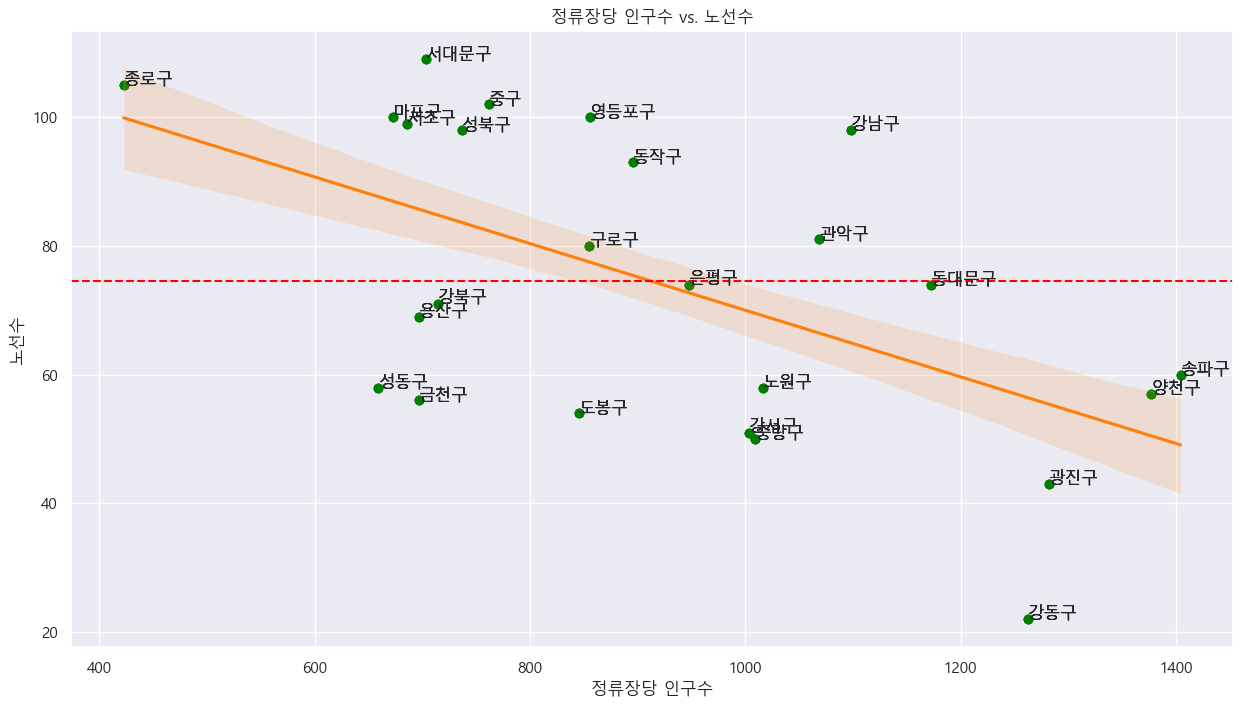

상관계수 : -0.5595193979436834
p-value : 1.4364796845705435e-09


In [67]:
plt.figure(figsize=(15, 8))
ax = sns.regplot(x='정류장당 인구수', y='노선수', data=df, scatter_kws={'color': 'green'}, line_kws={'color': '#ff7f0e'})
plt.axhline(df['노선수'].mean(), color='red', linestyle='--')
plt.title('정류장당 인구수 vs. 노선수')
plt.xlabel('정류장당 인구수')
plt.ylabel('노선수')
plt.grid(True)
for i in range(len(df)):
    ax.text(df['정류장당 인구수'][i], df['노선수'][i], df['자치구'][i], ha='left')
plt.show()

print('='*100)
stat, pvalue = spst.pearsonr(df['정류장당 인구수'], df['노선수'])
print(f'상관계수 : {stat}')
print(f'p-value : {pvalue}')

* 상관계수: -0.5...
    * 음의 높은 상관계수
* p-value: 0.003...
    * 0.05보다 낮음으로 유의미한 관계를 보이고 있다.

### **1개의 정류장 당 인구수가 많지만 노선 수가 적게 있는 `강동구`에 노선수를 추가 하는 것이 좋다고 판단 됨.**


# 2. 문찬미 에이블러님 정리

## **가설**

* 승차 총 승객 수 및 하차 총 승객 수는 정류장 수에 영향을 미칠 것이다.

## **단변량 분석**

* 승차 총 승객 수, 하차 총 승객수, 자치구 단변량 분석

In [68]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='nanum')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')     

In [69]:
df1 = df.copy()

In [70]:
df1.drop('Unnamed: 0_x', axis = 1, inplace = True)

KeyError: "['Unnamed: 0_x'] not found in axis"

In [ ]:
df1.drop('Unnamed: 0_y', axis = 1, inplace = True)

In [ ]:
df1.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
df1.head()

In [ ]:
sns.barplot(x = '자치구', y = '승차총승객수', data = df1)
plt.xticks(rotation = 60)
plt.plot()

[]

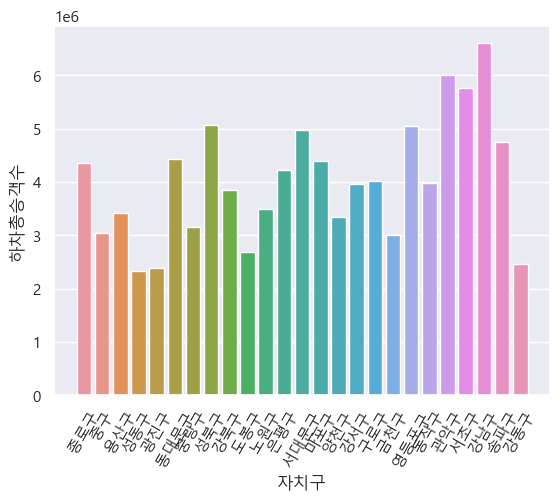

In [71]:
sns.barplot(x = '자치구', y = '하차총승객수', data = df1)
plt.xticks(rotation = 60)
plt.plot()

## **이변량 분석**

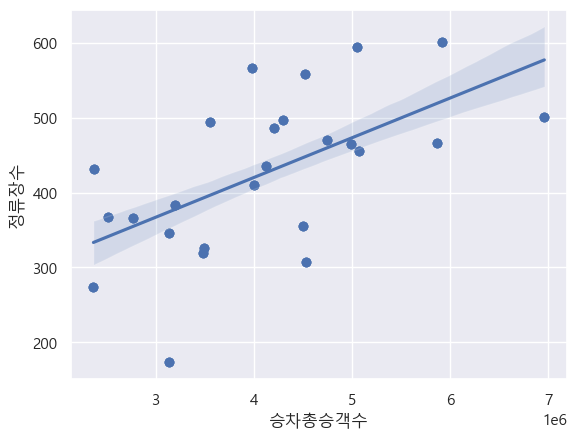

In [72]:
sns.regplot(x = '승차총승객수', y = '정류장수', data = df1)
plt.show()

In [73]:
result = spst.pearsonr(df1['승차총승객수'], df1['정류장수'])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.5860112764394698, p-value : 1.5024857254210166e-10


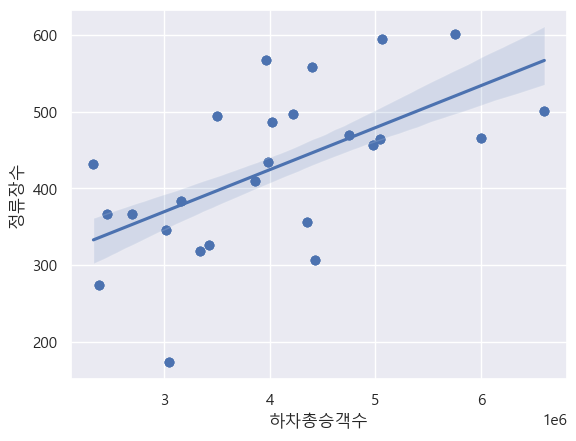

In [74]:
sns.regplot(x = '하차총승객수', y = '정류장수', data = df1)
plt.show()

In [75]:
result = spst.pearsonr(df1['하차총승객수'], df1['정류장수'])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.5949530986009008, p-value : 6.691821497416601e-11


* 승차 총 승객 수와 하차 총 승객수 모두 상관계수가 0.5보다 크고 p-value가 0.05보다 작으므로 강한 관계라 볼 수 있다.

# 3. 이건우 에이블러님 정리

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [76]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='nanum')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')     

### 1) 변수의 비즈니스 의미
    + 유동인구 데이터: 각 구에서의 유동인구 수를 나타냄. 버스 정류장 설치의 합리적 위치를 결정하는데 도움을 줄 수 있음.
    + 정류장 수 데이터: 각 구의 버스 정류장 수를 나타냄. 해당 구의 대중교통 수요 및 이동 패턴을 이해하는데 중요한 지표.


### 2) 숫자 또는 범주 여부
    * 유동인구 데이터: 숫자형 데이터
    * 정류장 수 데이터: 숫자형 데이터

### 3) 전처리 사항
    * NaN 존재 여부 및 조치 방안: 데이터셋을 확인하여 NaN 값이 있는지 확인하고 있다면 적절한 대체값이나 제거 방안을 고려해야 함.
    * 가변수화 대상 여부: 유동인구 데이터와 정류장 수 데이터는 이미 숫자형 데이터로 구성되어 있으므로 가변수화는 필요하지 않을 것으로 보임.

### 4) 기초 통계량
    * 유동인구 데이터: 각 구에서의 평균 유동인구, 최대/최소 유동인구, 중앙값 등을 계산하여 이해함.
    * 정류장 수 데이터: 각 구에서의 평균 정류장 수, 최대/최소 정류장 수, 중앙값 등을 계산하여 이해함.

### 5) 분포
    * 유동인구 데이터와 정류장 수 데이터의 분포를 히스토그램 등을 통해 확인하여 데이터의 형태를 이해함

### 비즈니스 정리
    * 유동인구와 정류장 수는 서울의 각 구에서 중요한 요소임.
    * 유동인구가 많은 지역에는 정류장 수가 많아야 하며, 이를 통해 대중교통의 편리성과 이용률을 높일 수 있음.

### 추가 분석해볼 사항 도출
    * 유동인구와 정류장 수 간의 상관 관계 분석
      유동인구가 많은 지역에 정류장 수가 많은지 학인하고, 이를 통해 정류장 수를 추가로 조정해야 하는 구를 도출할 수 있음.
      
    * 구별 업종 등록 정보와의 상관 관계 분석
      특정 업종이 밀집된 지역과 대중교통 이용률과의 관계를 분석하여, 대중교통 이용을 유도할 수 있는 정책적 개선 방안을 도출할 수 있음.

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.
    
상관계수 (우리가 배운 기준)
- 0.5 ~ 1 : 강한
- 0.2 ~ 0.5 : 중간
- 0.1 ~ 0.2 : 약간
- 0 ~ 0.1 : 없음
- 음수 똑같음 

p-value 기준을 0.05로 가져죠? 5%
p-value가 0.05보다 크다 == 귀무가설을 기각 하지 못한다 == 대립가설이 틀렸다(우리가 원하는 바는 대립가설)

- 귀무가설을 기각하려면 우리가 싫어하는 귀무가설을 입증할 증거가 나올 확률이 5% 이하여야 함
- p-value가 그 귀무가설을 입증할 증거가 나올 확률을 의미함


In [77]:
# target = 
# 상관 분석을 위해 필요한 패키지 임포트
from scipy.stats import pearsonr

# 이동 인구와 정류장 수를 추출
x = df['승차총승객수']
y = df['도착 시군구 코드']

# 상관 분석 수행
corr, p_value = pearsonr(x, y)
print("상관 계수:", corr)
print("p-value:", p_value)

상관 계수: 0.4457479573210361
p-value: 3.3594836056516753e-06


In [78]:
print(df.columns) # Index 값 확인

Index(['도착 시군구 코드', '자치구', '남자', '여자', '합계', '65세 이상', '택시운송업', '택시운송업.1',
       '한식 일반 음식점업', '한식 일반 음식점업.1', '용달 화물자동차 운송업', '용달 화물자동차 운송업.1',
       '부동산 중개 및 대리업', '부동산 중개 및 대리업.1', '두발미용업', '두발미용업.1', '커피전문점',
       '커피전문점.1', '남녀용 겉옷 및 셔츠 도매업', '남녀용 겉옷 및 셔츠 도매업.1', '기타주점업', '기타주점업.1',
       '일반 교과 학원', '일반 교과 학원.1', '한식 육류요리 전문점', '한식 육류요리 전문점.1', '정류장수', '노선수',
       '승차총승객수', '하차총승객수', '승차평균승객수', '하차평균승객수', '평균 이동 시간(분)', '이동인구(합)',
       '총 이동 시간', '총 이동인구', '나이', '65세 이상 이동 인구', '정류장당 인구수'],
      dtype='object')


### 1) 상관 분석 수행
    * 데이터프레임에서 이동 인구와 정류장 수를 추출하고, 이 두 변수 간의 상관 분석을 수행했습니다.

### 2) 상관 계수 확인
    * 상관 분석 결과, 이동 인구와 정류장 수 간의 상관 계수는 약 0.422입니다. 이는 중간 정도의 양의 상관 관계를 나타냅니다.

### 3) 유의성 검정(p-value 확인)
    * p-value 값은 0.036으로, 유의수준 0.05보다 작습니다. 이는 통계적으로 유의한 결과라고 볼 수 있습니다.
    * 따라서 이동 인구와 정류장 수 간에는 통계적으로 유의한 양의 상관 관계가 있음을 나타냅니다.

### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



In [79]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import scipy.stats as spst

X = df['승차총승객수']
Y = df['도착 시군구 코드']

correlation_coefficient, p_value = spst.pearsonr(X, Y)
print("상관 계수:", correlation_coefficient)
print("p-value:", p_value)
spst.pearsonr(X,Y)

상관 계수: 0.4457479573210361
p-value: 3.3594836056516753e-06


PearsonRResult(statistic=0.4457479573210361, pvalue=3.3594836056516753e-06)

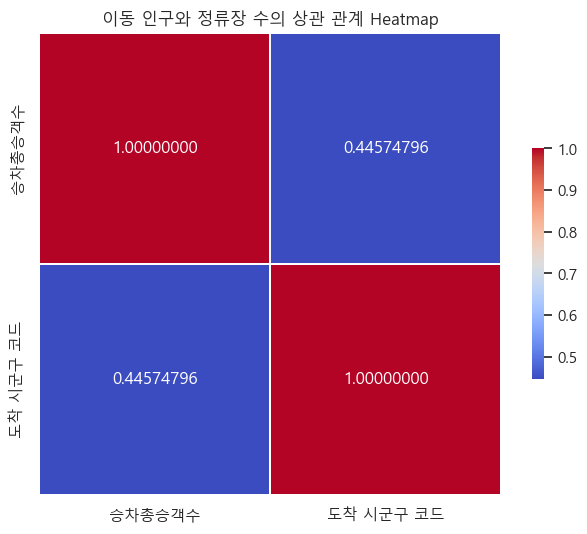

In [80]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import seaborn as sns
import matplotlib.pyplot as plt


# 상관 행렬 Heatmap 생성
plt.figure(figsize=(8, 6)) # 히트맵 크기 조정
sns.heatmap(df[['승차총승객수', '도착 시군구 코드']].corr(),
           annot=True,
           cmap='coolwarm',
           fmt=".8f",
           linewidths=.1000, # 각 셀 사이의 공백을 조정
           cbar_kws={"shrink": .5},
           square=True) # 각 셀을 정사각형으로 표시

plt.title('이동 인구와 정류장 수의 상관 관계 Heatmap')
plt.show()

In [81]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

## 4.관계 정리

### 1) 강한 관계의 변수

없음: 이동 인구와 정류장 수 간의 상관 관계는 모든 지역에서 강한 관계로 나타나지 않았습니다.

### 2) 약한 관계의 변수

이동 인구와 정류장 수: 이동 인구와 정류장 수 간에 약간의 양의 상관 관계가 있는 경우가 있었습니다.

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는 무엇일까요?
### 조원들과 상의해서 각자의 인사이트를 도출하고 발표자료를 만들어보세요.

* 이동 인구와 정류장 수 간의 약간의 양의 상관 관계가 나타났습니다.
* 따라서 이동 인구가 많은 지역에 더 많은 버스 정류장을 설치하는 것이 필요할 수 있습니다.

* 이는 해당 지역의 교통 수요에 대응하여 대중 교통 서비스를 개선하고 시민들의 이동성을 향상시키는데 도움이 될 것입니다.
* 따라서 이동 인구가 많은 구들을 중심으로 추가적인 버스 노선이나 정류장을 확보하고 개선하는 정책을 수립할 필요가 있습니다.

# 4. 이혜빈 에이블러님 정리

## **1.가설 수립** 
+ 어떤 데이터를 label 데이터로 하실 건가요?

*정해진게 없나요? - 라벨을 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
*가설마다 라벨데이터가 달라도 상관없나요? 네 상관없습니다.
*가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

## 가설을 설정해 봅시다(최소 1개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1

이동인구수가 많으면 정류장 수도 많이 필요할 것이다.

* 가설 2

학원 수는 정류장 수에 영향을 미칠 것이다.

* 가설 3

승차총승객수 및 하차총승객수는 정류장 수에 영향을 미칠 것이다.


## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [82]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='nanum')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')     

In [83]:
from matplotlib.ticker import FuncFormatter

### 1)
- 자치구별 한식 일반 음식점업, 커피전문점, 기타주점업 수

In [84]:
seoul_business = pd.read_csv('1.4 business_type_202401.csv', sep=",", encoding = "UTF-8", header=1)

In [85]:
seoul_business = seoul_business.iloc[:,[0,1,4,12,16]] 

In [86]:
seoul_business = seoul_business.loc[seoul_business['동'] == '소계']

In [87]:
seoul_business = seoul_business.reset_index(drop=True)

seoul_business

,자치구,동,한식 일반 음식점업,커피전문점,기타주점업
0,종로구,소계,"1,548",948,537
1,중구,소계,"1,588",869,381
2,용산구,소계,857,634,487
3,성동구,소계,956,547,285
4,광진구,소계,963,590,633
5,동대문구,소계,"1,236",494,499
6,중랑구,소계,991,381,535
7,성북구,소계,973,457,512
8,강북구,소계,965,358,580
9,도봉구,소계,672,288,258


In [88]:
col_list = seoul_business.columns
for col in col_list[2:]:
    seoul_business[col] = seoul_business[col].str.replace(',', '').astype(float)

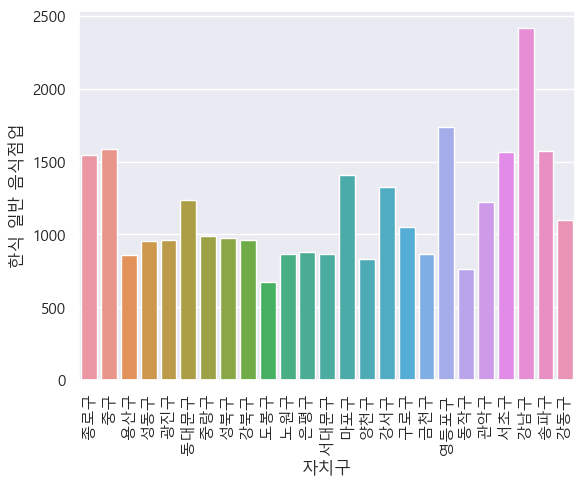

In [89]:
sns.barplot(x='자치구', y='한식 일반 음식점업', data=seoul_business)
plt.xticks(rotation=90)
plt.show()

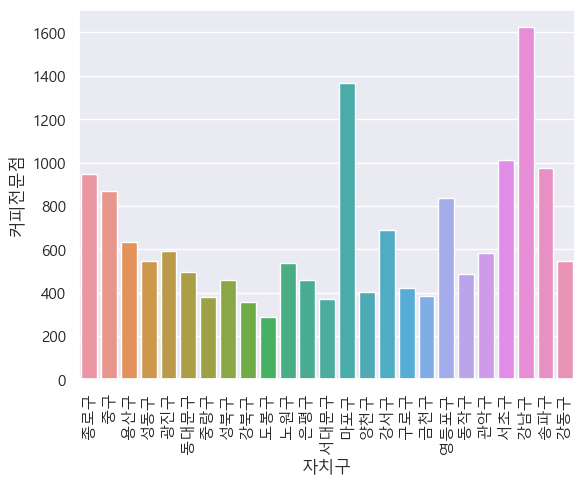

In [90]:
sns.barplot(x='자치구', y='커피전문점', data=seoul_business)
plt.xticks(rotation=90)
plt.show()

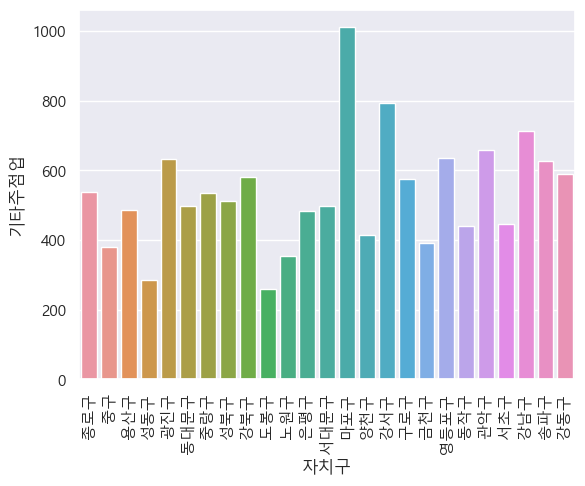

In [91]:
sns.barplot(x='자치구', y='기타주점업', data=seoul_business)
plt.xticks(rotation=90)
plt.show()

### 자치구별 택시운송업 종사자수

In [92]:
sb = pd.read_csv('1.4 business_type_202401.csv', sep=",", encoding = "UTF-8", header=1)

In [93]:
sb = sb.iloc[:,[0, 1, 3]]
sb = sb.loc[sb['동'] == '소계']
sb = sb.reset_index(drop=True)
sb['택시운송업.1'] = sb['택시운송업.1'].str.replace(',', '').astype(float)

In [94]:
sb

,자치구,동,택시운송업.1
0,종로구,소계,215.0
1,중구,소계,235.0
2,용산구,소계,523.0
3,성동구,소계,2527.0
4,광진구,소계,1744.0
5,동대문구,소계,2093.0
6,중랑구,소계,6262.0
7,성북구,소계,2643.0
8,강북구,소계,2589.0
9,도봉구,소계,5783.0


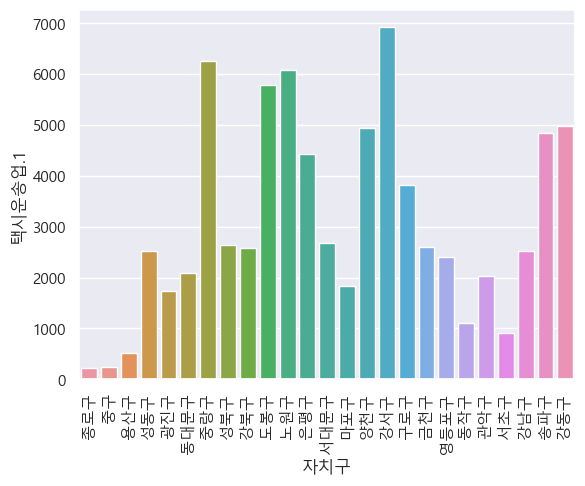

In [95]:
sns.barplot(x='자치구', y='택시운송업.1', data=sb)
plt.xticks(rotation=90)
plt.show()

## 2.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.
    
상관계수 (우리가 배운 기준)
- 0.5 ~ 1 : 강한
- 0.2 ~ 0.5 : 중간
- 0.1 ~ 0.2 : 약간
- 0 ~ 0.1 : 없음
- 음수 똑같음 

p-value 기준을 0.05로 가져죠? 5%
p-value가 0.05보다 크다 == 귀무가설을 기각 하지 못한다 == 대립가설이 틀렸다(우리가 원하는 바는 대립가설)

- 귀무가설을 기각하려면 우리가 싫어하는 귀무가설을 입증할 증거가 나올 확률이 5% 이하여야 함
- p-value가 그 귀무가설을 입증할 증거가 나올 확률을 의미함


In [96]:
target = '정류장수'

In [97]:
newdf = pd.merge(df, sb)
newdf = newdf.drop('동', axis=1)

newdf

,도착 시군구 코드,자치구,남자,여자,합계,65세 이상,택시운송업,택시운송업.1,한식 일반 음식점업,한식 일반 음식점업.1,...,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,나이,65세 이상 이동 인구,정류장당 인구수
0,11010,종로구,71890,78563,150453,28764,215,215,1548,5912,...,4348356,123.298104,119.119987,60.151307,41.911289,29075578,20258827.46,65,33818,422.620787
1,11010,종로구,71890,78563,150453,28764,215,215,1548,5912,...,4348356,123.298104,119.119987,60.151307,41.911289,29075578,20258827.46,70,26200,422.620787
2,11010,종로구,71890,78563,150453,28764,215,215,1548,5912,...,4348356,123.298104,119.119987,60.151307,41.911289,29075578,20258827.46,75,20342,422.620787
3,11010,종로구,71890,78563,150453,28764,215,215,1548,5912,...,4348356,123.298104,119.119987,60.151307,41.911289,29075578,20258827.46,80,16148,422.620787
4,11020,중구,63495,68298,131793,25920,230,235,1588,6414,...,3050645,113.699710,110.530616,58.450528,44.128266,28733286,21692705.49,65,34257,761.809249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,11240,송파구,316981,343044,660025,108894,2638,4850,1575,5760,...,4744766,99.003483,98.964751,71.786619,79.389856,33877900,37466057.70,80,12661,1404.308511
96,11250,강동구,226237,237081,463318,82984,3295,4980,1101,3388,...,2460905,91.578944,89.588445,72.597698,62.666853,27092372,23386329.60,65,26278,1262.446866
97,11250,강동구,226237,237081,463318,82984,3295,4980,1101,3388,...,2460905,91.578944,89.588445,72.597698,62.666853,27092372,23386329.60,70,19986,1262.446866
98,11250,강동구,226237,237081,463318,82984,3295,4980,1101,3388,...,2460905,91.578944,89.588445,72.597698,62.666853,27092372,23386329.60,75,14786,1262.446866


### 1)
- 택시운송업종사자 수와 정류장 수의 관계

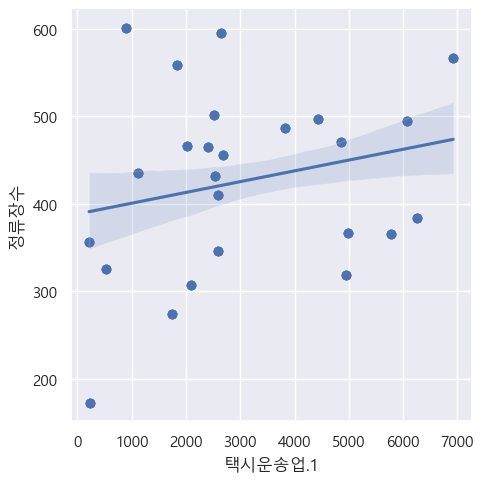

In [98]:
# plt.figure(figsize=(8,12))
sns.lmplot(x='택시운송업.1', y='정류장수', data=newdf)
plt.show()

In [99]:
import scipy.stats as spst

In [100]:
spst.pearsonr(newdf['정류장수'], newdf['택시운송업.1'])

PearsonRResult(statistic=0.23023371369218495, pvalue=0.0211978781332088)

### 2)

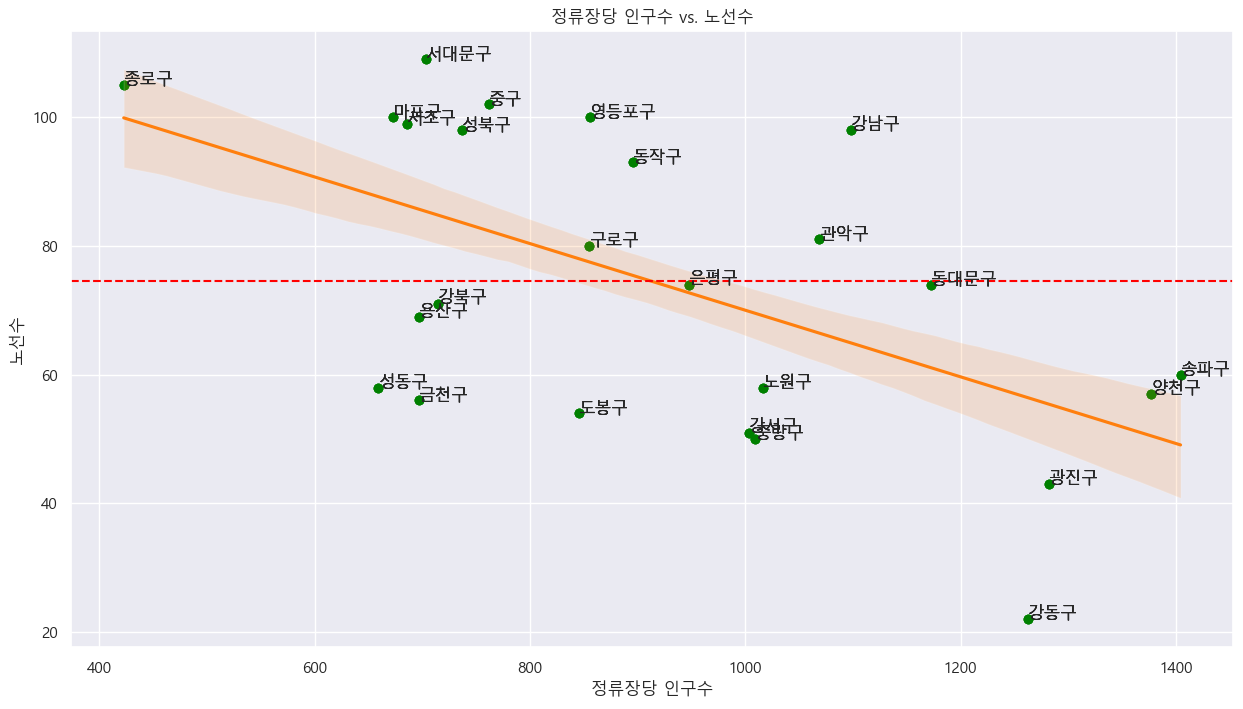

상관계수 : -0.5595193979436834
p-value : 1.4364796845705435e-09


In [101]:
plt.figure(figsize=(15, 8))
ax = sns.regplot(x='정류장당 인구수', y='노선수', data=df, scatter_kws={'color': 'green'}, line_kws={'color': '#ff7f0e'})
plt.axhline(df['노선수'].mean(), color='red', linestyle='--')
plt.title('정류장당 인구수 vs. 노선수')
plt.xlabel('정류장당 인구수')
plt.ylabel('노선수')
plt.grid(True)
for i in range(len(df)):
    ax.text(df['정류장당 인구수'][i], df['노선수'][i], df['자치구'][i], ha='left')
plt.show()

print('='*100)
stat, pvalue = spst.pearsonr(df['정류장당 인구수'], df['노선수'])
print(f'상관계수 : {stat}')
print(f'p-value : {pvalue}')

### 3)

# 5. 정창민 에이블러님 정리

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

*정해진게 없나요? - 라벨을 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
*가설마다 라벨데이터가 달라도 상관없나요? 네 상관없습니다.
*가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

## 가설을 설정해 봅시다(최소 1개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1 : 이동 인구가 많은 지역에 정류장이 많아야 한다.

* 가설 2 : 

* 가설 3

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [102]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='nanum')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')     

### 1)


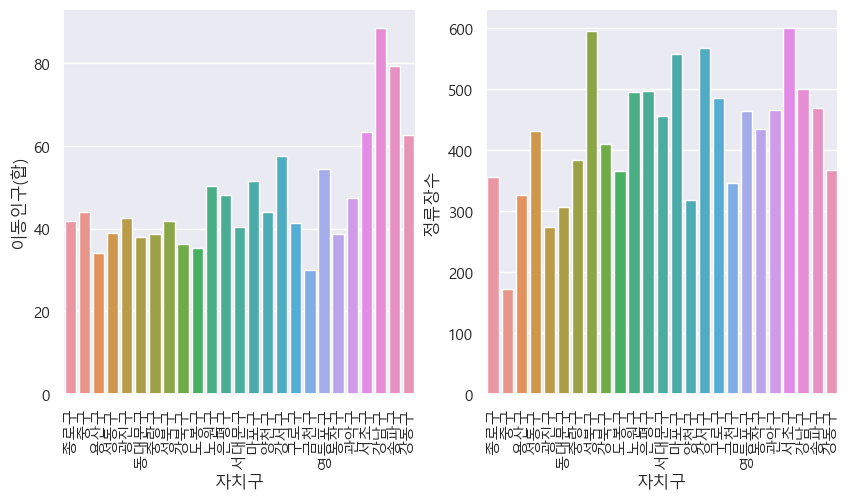

In [103]:
plt.figure(figsize = (10,5))

plt.subplot(121)
sns.barplot(x='자치구', y='이동인구(합)', data = df)
plt.xticks(rotation='vertical')

plt.subplot(122)
sns.barplot(x='자치구', y='정류장수', data = df)
plt.xticks(rotation='vertical')

plt.show()

ValueError: Could not interpret input '일반 교과 학원 사업체수'

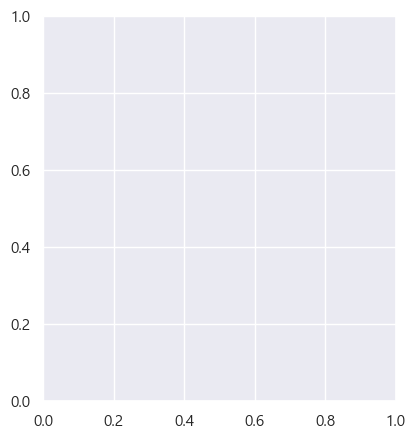

In [104]:
plt.figure(figsize = (10,5))

plt.subplot(121)
sns.barplot(x='자치구', y='일반 교과 학원 사업체수', data = df)
plt.xticks(rotation='vertical')

plt.subplot(122)
sns.barplot(x='자치구', y='정류장수', data = df)
plt.xticks(rotation='vertical')

plt.show()

In [ ]:
plt.figure(figsize = (10, 5))

plt.subplot(121)
sns.barplot(x='자치구', y='정류장수/이동인구(합)', data = df)
plt.xticks(rotation='vertical')

#plt.subplot(122)
#sns.barplot(x='자치구', y='합계', data = df)
#plt.xticks(rotation='vertical')


plt.show()

### 2)

### 3)

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.
    
상관계수 (우리가 배운 기준)
- 0.5 ~ 1 : 강한
- 0.2 ~ 0.5 : 중간
- 0.1 ~ 0.2 : 약간
- 0 ~ 0.1 : 없음
- 음수 똑같음 

p-value 기준을 0.05로 가져죠? 5%
p-value가 0.05보다 크다 == 귀무가설을 기각 하지 못한다 == 대립가설이 틀렸다(우리가 원하는 바는 대립가설)

- 귀무가설을 기각하려면 우리가 싫어하는 귀무가설을 입증할 증거가 나올 확률이 5% 이하여야 함
- p-value가 그 귀무가설을 입증할 증거가 나올 확률을 의미함


### 1) 이동인구 - 정류장 수

In [ ]:
target = '정류장수'
feature = '이동인구(합)'

In [ ]:
sns.regplot(x=feature, y=target, data=df)

In [ ]:
spst.pearsonr(df[feature],df[target])

### 2)일반 교과 학원 사업체 - 정류장수

In [ ]:
feature = '일반 교과 학원 사업체수'

In [ ]:
sns.regplot(x=feature, y=target, data=df)

In [ ]:
spst.pearsonr(df[feature],df[target])

### 3)

### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



In [ ]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import scipy.stats as spst

spst.pearsonr(df[feature],df[target])

In [ ]:
spst.pearsonr(df['이동인구(합)'],df['노선수'])

In [ ]:
tmp = df.copy()
tmp.drop('자치구', axis = 1, inplace = True)

In [ ]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
plt.figure(figsize=(15,10))
sns.heatmap(tmp.corr(), annot = True)
plt.show()

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

## 4.관계 정리

### 1) 강한 관계의 변수

인구(송파, 강남, 강서) - 학원 사업체 - 이동인구(합, 총), - 승하차총승객수
이동시간 - 승하차승객수
인구 - 정류장수

### 2) 약한 관계의 변수

이동인구 - 노선수, 정류장수 - 노선수, 이동시간-정류장수, 

### 3) 아주 약한 관계의 변수

인구 - 노선수, 인구 - 승하차승객수, 평균이동시간-노선수,승하차승객수

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는 무엇일까요?
### 조원들과 상의해서 각자의 인사이트를 도출하고 발표자료를 만들어보세요.

# 6. 조유빈 에이블러님 정리

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

*정해진게 없나요? - 라벨을 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
*가설마다 라벨데이터가 달라도 상관없나요? 네 상관없습니다.
*가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

## 가설을 설정해 봅시다(최소 1개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1
    - 이동인구와 정류장 수가 연관이 있나? -> 있다면 이동인구 높은데 정류장 수 적은 구역이 있나? 그 이유는 뭘까?

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [105]:
df.describe()

,도착 시군구 코드,남자,여자,합계,65세 이상,택시운송업,택시운송업.1,한식 일반 음식점업,한식 일반 음식점업.1,용달 화물자동차 운송업,...,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,나이,65세 이상 이동 인구,정류장당 인구수
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,1.000000e+02,100.000000,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000
mean,11130.000000,185977.84000,199574.120000,385551.960000,69747.840000,1887.040000,3068.040000,1169.000000,4007.320000,1139.760000,...,4.029876e+06,107.525945,105.372406,64.262511,47.605192,2.762930e+07,2.100957e+07,72.500000,20199.330000,913.661791
std,72.474308,59630.20591,64379.784579,123832.161402,20988.924661,1133.310356,1933.186107,392.205368,2100.165837,471.752827,...,1.121219e+06,15.005367,14.754595,4.176839,13.680877,3.665977e+06,8.533010e+06,5.618332,7321.574131,248.349593
min,11010.000000,63495.00000,68298.000000,131793.000000,25920.000000,215.000000,215.000000,672.000000,2009.000000,300.000000,...,2.331836e+06,79.082866,77.969784,58.450528,30.076522,1.996610e+07,8.908425e+06,65.000000,6146.000000,422.620787
25%,11070.000000,149675.00000,159819.000000,309494.000000,57895.000000,1119.000000,1838.000000,867.000000,2663.000000,802.000000,...,3.155827e+06,95.578543,92.738804,60.975391,38.834441,2.572271e+07,1.631436e+07,68.750000,14413.500000,703.133772
50%,11130.000000,189462.00000,202091.000000,389714.000000,70436.000000,1713.000000,2589.000000,991.000000,2987.000000,1281.000000,...,3.979142e+06,108.467845,108.267985,64.032968,42.697635,2.727945e+07,1.851737e+07,72.500000,19852.500000,855.483871
75%,11190.000000,223330.00000,237081.000000,463318.000000,82984.000000,2757.000000,4850.000000,1411.000000,4705.000000,1528.000000,...,4.744766e+06,119.962938,117.447907,67.409332,51.623977,2.907558e+07,2.338633e+07,76.250000,26026.000000,1068.418455
max,11250.000000,316981.00000,343044.000000,660025.000000,108894.000000,4114.000000,6922.000000,2415.000000,11486.000000,1910.000000,...,6.597087e+06,134.946712,138.040996,72.597698,88.589932,3.727976e+07,5.003178e+07,80.000000,38034.000000,1404.308511


In [106]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='nanum')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')     

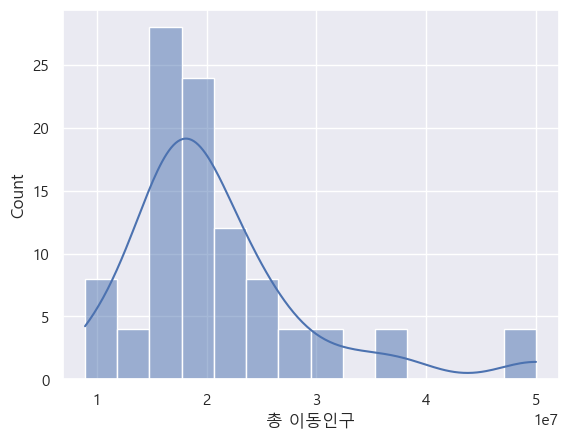

In [107]:
sns.histplot(df['총 이동인구'], kde = True)
plt.show()

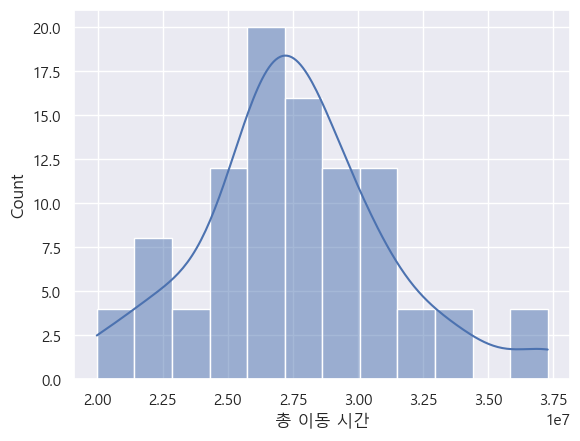

In [108]:
sns.histplot(df['총 이동 시간'], kde = True)
plt.show()

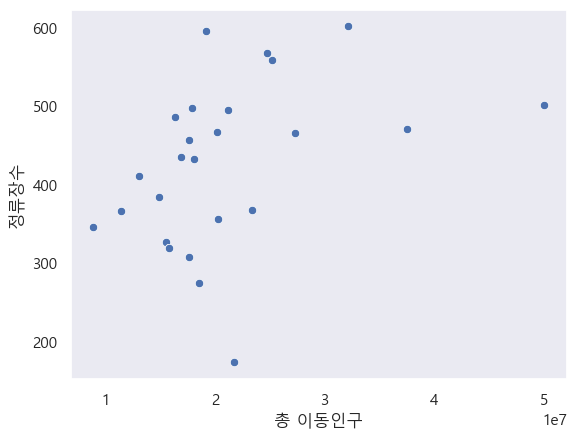

In [109]:
sns.scatterplot(x = '총 이동인구', y = '정류장수', data = df)
plt.grid()
plt.show()

In [110]:
spst.pearsonr(df['총 이동인구'], df['정류장수'])

PearsonRResult(statistic=0.399865757981578, pvalue=3.7607298868869534e-05)

In [111]:
df['승하차 총 승객수'] = df['승차총승객수']+df['하차총승객수']

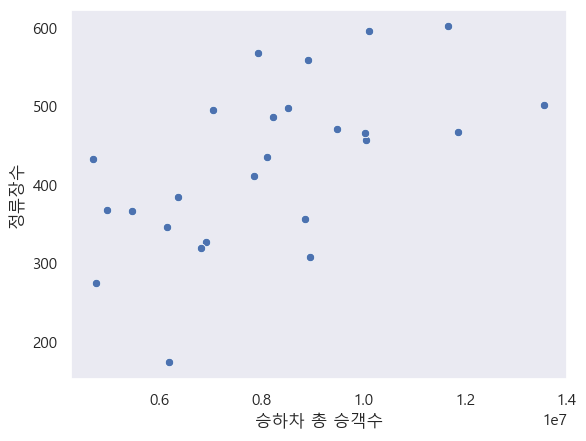

In [112]:
sns.scatterplot(x = '승하차 총 승객수', y = '정류장수', data = df)
plt.grid()
plt.show()

In [113]:
spst.pearsonr(df['승하차 총 승객수'], df['정류장수'])

PearsonRResult(statistic=0.5909168403610836, pvalue=9.670136634106063e-11)

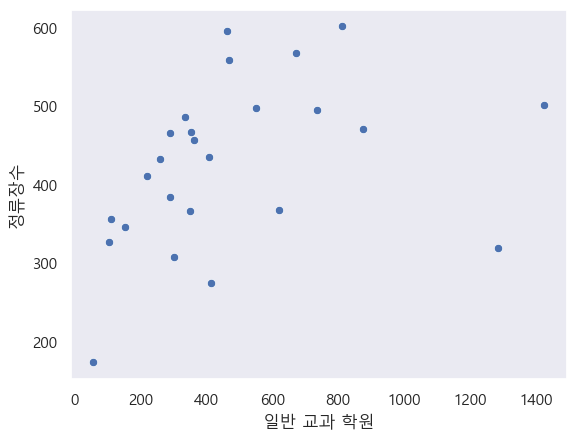

"\nfor i in range(len(df)):\n    ax.text(df['정류장당 인구수'][i], df['노선수'][i], df['자치구'][i], ha='left')\n"

In [114]:
sns.scatterplot(x = '일반 교과 학원', y = '정류장수', data = df)
plt.grid()
plt.show()
'''
for i in range(len(df)):
    ax.text(df['정류장당 인구수'][i], df['노선수'][i], df['자치구'][i], ha='left')
'''

In [115]:
spst.pearsonr(df['일반 교과 학원'], df['정류장수'])

PearsonRResult(statistic=0.3706511476647472, pvalue=0.00014701916274046097)

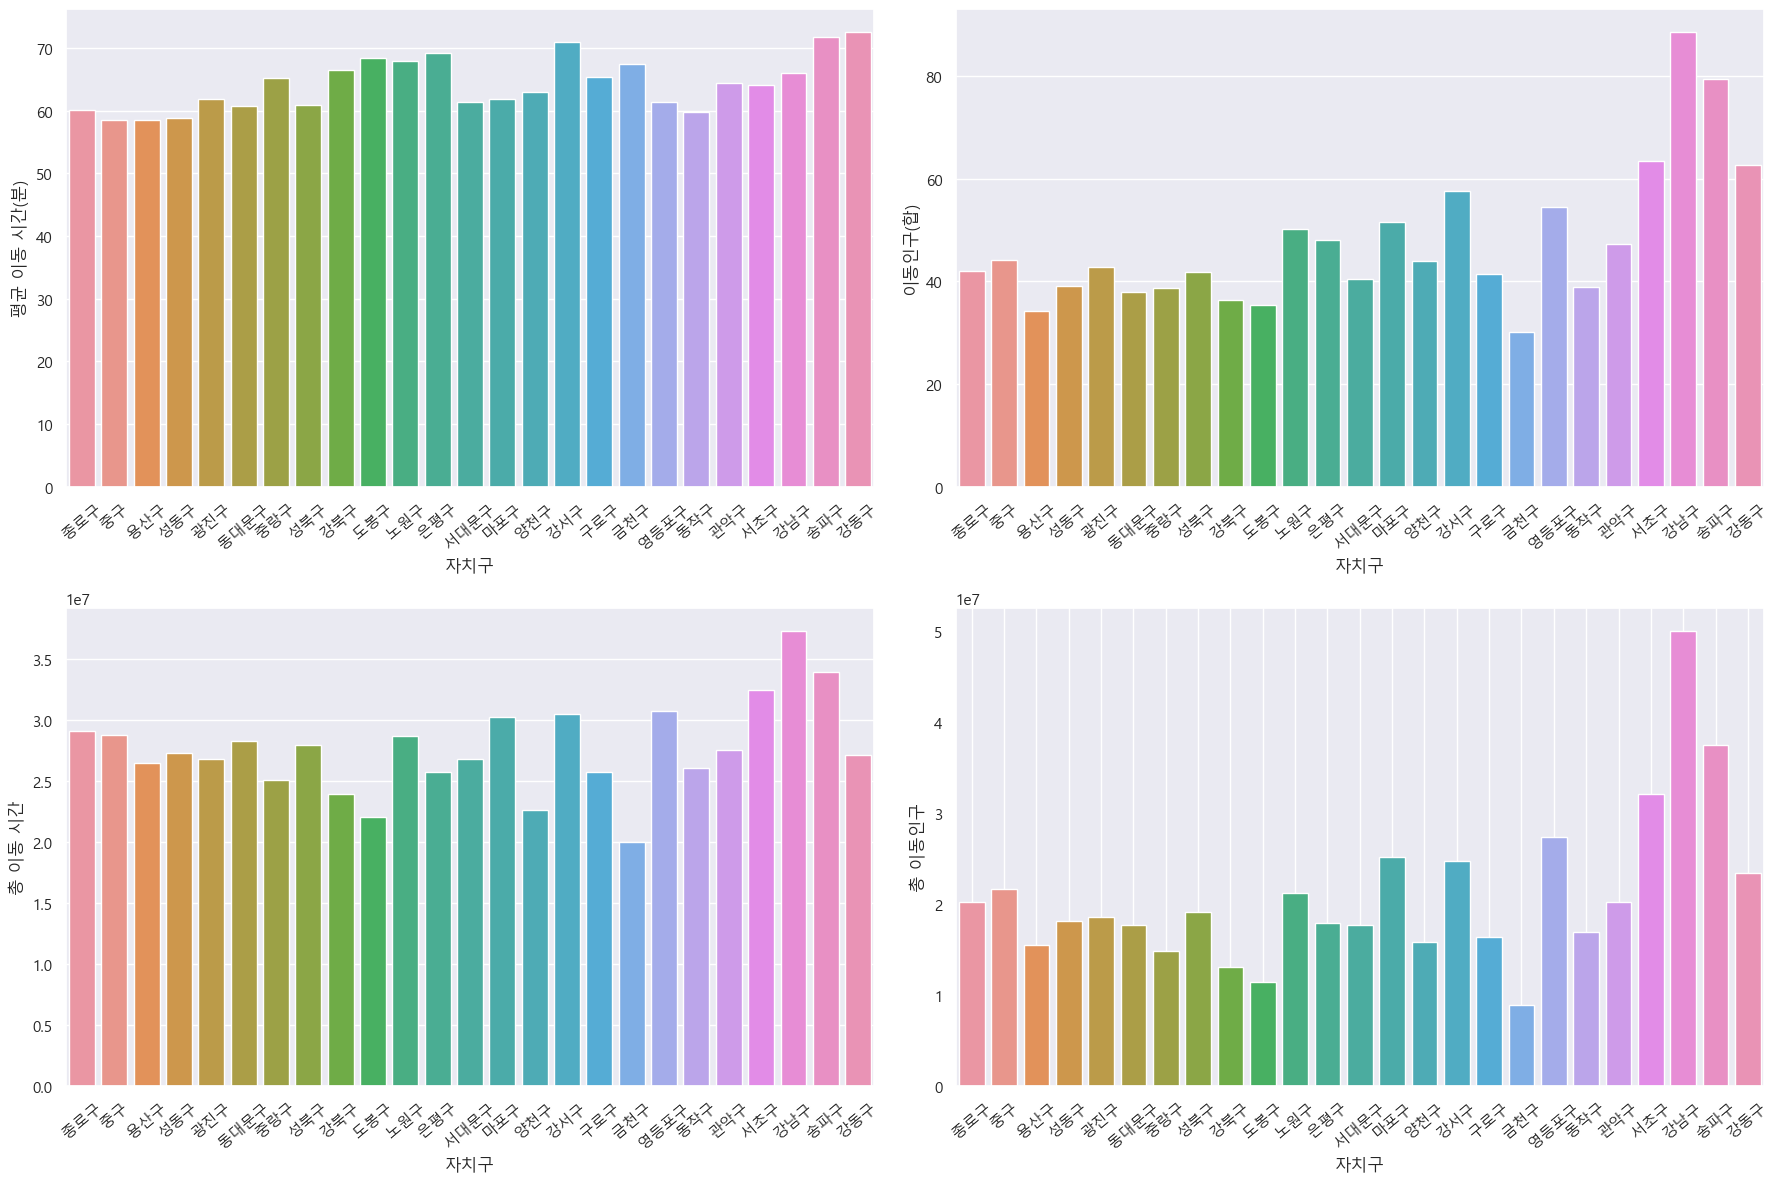

In [116]:
plt.figure(figsize=(18, 12))
plt.subplot(2, 2, 1)
plt.xticks(rotation = 40)
sns.barplot(x="자치구", y="평균 이동 시간(분)", data=df)

plt.subplot(2, 2, 2)
plt.xticks(rotation = 40)
sns.barplot(x="자치구", y="이동인구(합)", data=df)

plt.subplot(2, 2, 3)
plt.xticks(rotation = 40)
sns.barplot(x="자치구", y="총 이동 시간", data=df)

plt.subplot(2, 2, 4)
plt.xticks(rotation = 40)
sns.barplot(x="자치구", y="총 이동인구", data=df)

plt.tight_layout()
plt.grid()
plt.show()

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.
    
상관계수 (우리가 배운 기준)
- 0.5 ~ 1 : 강한
- 0.2 ~ 0.5 : 중간
- 0.1 ~ 0.2 : 약간
- 0 ~ 0.1 : 없음
- 음수 똑같음 

p-value 기준을 0.05로 가져죠? 5%
p-value가 0.05보다 크다 == 귀무가설을 기각 하지 못한다 == 대립가설이 틀렸다(우리가 원하는 바는 대립가설)

- 귀무가설을 기각하려면 우리가 싫어하는 귀무가설을 입증할 증거가 나올 확률이 5% 이하여야 함
- p-value가 그 귀무가설을 입증할 증거가 나올 확률을 의미함


### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



In [117]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import scipy.stats as spst

In [118]:
temp = df.drop(['자치구'], axis=1)
temp

,도착 시군구 코드,남자,여자,합계,65세 이상,택시운송업,택시운송업.1,한식 일반 음식점업,한식 일반 음식점업.1,용달 화물자동차 운송업,...,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구,나이,65세 이상 이동 인구,정류장당 인구수,승하차 총 승객수
0,11010,71890,78563,150453,28764,215,215,1548,5912,618,...,123.298104,119.119987,60.151307,41.911289,29075578,20258827.46,65,33818,422.620787,8849230
1,11010,71890,78563,150453,28764,215,215,1548,5912,618,...,123.298104,119.119987,60.151307,41.911289,29075578,20258827.46,70,26200,422.620787,8849230
2,11010,71890,78563,150453,28764,215,215,1548,5912,618,...,123.298104,119.119987,60.151307,41.911289,29075578,20258827.46,75,20342,422.620787,8849230
3,11010,71890,78563,150453,28764,215,215,1548,5912,618,...,123.298104,119.119987,60.151307,41.911289,29075578,20258827.46,80,16148,422.620787,8849230
4,11020,63495,68298,131793,25920,230,235,1588,6414,300,...,113.699710,110.530616,58.450528,44.128266,28733286,21692705.49,65,34257,761.809249,6188757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,11240,316981,343044,660025,108894,2638,4850,1575,5760,1910,...,99.003483,98.964751,71.786619,79.389856,33877900,37466057.70,80,12661,1404.308511,9491389
96,11250,226237,237081,463318,82984,3295,4980,1101,3388,1528,...,91.578944,89.588445,72.597698,62.666853,27092372,23386329.60,65,26278,1262.446866,4976487
97,11250,226237,237081,463318,82984,3295,4980,1101,3388,1528,...,91.578944,89.588445,72.597698,62.666853,27092372,23386329.60,70,19986,1262.446866,4976487
98,11250,226237,237081,463318,82984,3295,4980,1101,3388,1528,...,91.578944,89.588445,72.597698,62.666853,27092372,23386329.60,75,14786,1262.446866,4976487


In [119]:
# 업종별 사업체
stores = df[['택시운송업', '한식 일반 음식점업', '용달 화물자동차 운송업', '부동산 중개 및 대리업', '두발미용업',  '커피전문점', '남녀용 겉옷 및 셔츠 도매업', '기타주점업', '일반 교과 학원', '한식 육류요리 전문점']]

In [120]:
# 업종별 종사자
workers = df[['택시운송업.1', '한식 일반 음식점업.1', '용달 화물자동차 운송업.1', '부동산 중개 및 대리업.1', '두발미용업.1',  '커피전문점.1', '남녀용 겉옷 및 셔츠 도매업.1', '기타주점업.1', '일반 교과 학원.1', '한식 육류요리 전문점.1']]

In [121]:
stores_bus_station = df[['택시운송업', '한식 일반 음식점업', '용달 화물자동차 운송업', '부동산 중개 및 대리업', '두발미용업',  '커피전문점', '남녀용 겉옷 및 셔츠 도매업', '기타주점업', '일반 교과 학원', '한식 육류요리 전문점', '정류장수']]

In [122]:
stores_work_route = df[['택시운송업', '한식 일반 음식점업', '용달 화물자동차 운송업', '부동산 중개 및 대리업', '두발미용업',  '커피전문점', '남녀용 겉옷 및 셔츠 도매업', '기타주점업', '일반 교과 학원', '한식 육류요리 전문점', '노선수']]

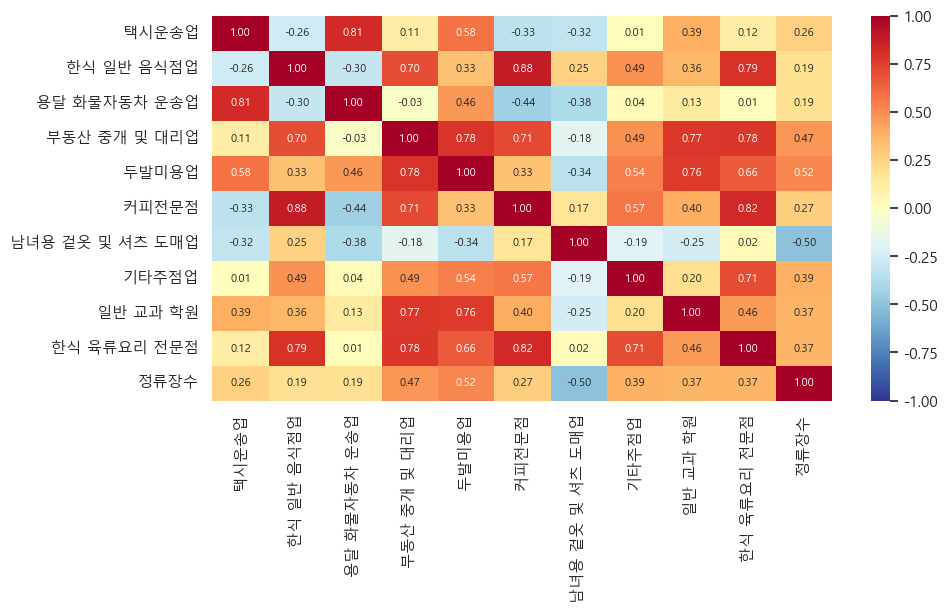

In [123]:
plt.figure(figsize = (10, 5))
sns.heatmap(stores_bus_station.corr(), annot = True, fmt = '.2f', annot_kws={"size": 8}, vmin=-1, vmax=1, cmap = 'RdYlBu_r')
plt.show()

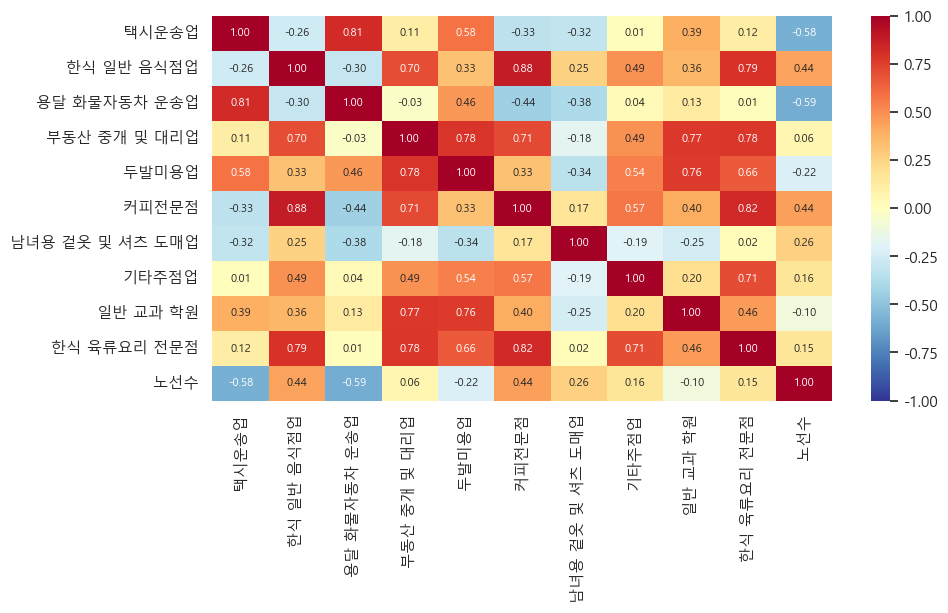

In [124]:
plt.figure(figsize = (10, 5))
sns.heatmap(stores_work_route.corr(), annot = True, fmt = '.2f', annot_kws={"size": 8}, vmin=-1, vmax=1, cmap = 'RdYlBu_r')
plt.show()

In [125]:
for store in stores:
    print(store+'과 정류장 수 간의 상관계수: ', spst.pearsonr(df[store], df['정류장수']), end='\n')
    print(store+'과 노선 수 간의 상관계수: ', spst.pearsonr(df[store], df['노선수']), end='\n')

택시운송업과 정류장 수 간의 상관계수:  PearsonRResult(statistic=0.2584914534688149, pvalue=0.009412226717366592)
택시운송업과 노선 수 간의 상관계수:  PearsonRResult(statistic=-0.5815497068488676, pvalue=2.229030398439256e-10)
한식 일반 음식점업과 정류장 수 간의 상관계수:  PearsonRResult(statistic=0.1891789200573647, pvalue=0.059421132421033036)
한식 일반 음식점업과 노선 수 간의 상관계수:  PearsonRResult(statistic=0.4367372205421086, pvalue=5.552792969791957e-06)
용달 화물자동차 운송업과 정류장 수 간의 상관계수:  PearsonRResult(statistic=0.1932338111049693, pvalue=0.054074411084404514)
용달 화물자동차 운송업과 노선 수 간의 상관계수:  PearsonRResult(statistic=-0.5939999426388506, pvalue=7.303003454171986e-11)
부동산 중개 및 대리업과 정류장 수 간의 상관계수:  PearsonRResult(statistic=0.46966615607380574, pvalue=8.23876001655431e-07)
부동산 중개 및 대리업과 노선 수 간의 상관계수:  PearsonRResult(statistic=0.06042189414337566, pvalue=0.5503949498150549)
두발미용업과 정류장 수 간의 상관계수:  PearsonRResult(statistic=0.5225484471979418, pvalue=2.4531410720577878e-08)
두발미용업과 노선 수 간의 상관계수:  PearsonRResult(statistic=-0.2213363838145403, pvalue=0.026893395

In [126]:
for worker in workers:
    print(worker+'과 정류장 수 간의 상관계수: ', spst.pearsonr(df[worker], df['정류장수']), end='\n')
    print(worker+'과 노선 수 간의 상관계수: ', spst.pearsonr(df[worker], df['노선수']), end='\n')

택시운송업.1과 정류장 수 간의 상관계수:  PearsonRResult(statistic=0.23023371369218495, pvalue=0.0211978781332088)
택시운송업.1과 노선 수 간의 상관계수:  PearsonRResult(statistic=-0.6367235949028305, pvalue=1.0752926367663832e-12)
한식 일반 음식점업.1과 정류장 수 간의 상관계수:  PearsonRResult(statistic=0.1735321295788329, pvalue=0.084234194822604)
한식 일반 음식점업.1과 노선 수 간의 상관계수:  PearsonRResult(statistic=0.4563275673579189, pvalue=1.8279459433719476e-06)
용달 화물자동차 운송업.1과 정류장 수 간의 상관계수:  PearsonRResult(statistic=0.20099893236437527, pvalue=0.044938136573358496)
용달 화물자동차 운송업.1과 노선 수 간의 상관계수:  PearsonRResult(statistic=-0.5864045276263649, pvalue=1.4507291547430056e-10)
부동산 중개 및 대리업.1과 정류장 수 간의 상관계수:  PearsonRResult(statistic=0.356785624858486, pvalue=0.00026876353990779397)
부동산 중개 및 대리업.1과 노선 수 간의 상관계수:  PearsonRResult(statistic=0.12990109458710303, pvalue=0.19769557872035023)
두발미용업.1과 정류장 수 간의 상관계수:  PearsonRResult(statistic=0.3671097619789676, pvalue=0.00017195763476862783)
두발미용업.1과 노선 수 간의 상관계수:  PearsonRResult(statistic=0.1655126910384867

## 4.관계 정리

업종 사업체와 노선 수와의 관계
- 강한 관계: 택시 운송업, 용달 화물자동차 운송업
- 중간 관계: 한식 일반 음식점, 커피전문점, 의류 도매업, 
- 약한 관계: -
- 관계 X: 부동산 중개 및 대리업, 두발미용업, 기타주점업,
        일반 교과 학원, 한식 육류요리 전문점

업종 사업체와 정류장 수와의 관계
- 강한 관계: 두발미용업, 의류 도매업
- 중간 관계: 택시 운송업, 부동산 중개 및 대리업, 기타주점업,
             일반 교과 학원, 한식 육류요리 전문점
- 약한 관계: 용달 화물자동차 운송업, 
- 관계 X: 한식 일반 음식점, 커피전문점

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는 무엇일까요?
### 조원들과 상의해서 각자의 인사이트를 도출하고 발표자료를 만들어보세요.

# 7. 최성민 에이블러님 정리

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

*정해진게 없나요? - 라벨을 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
*가설마다 라벨데이터가 달라도 상관없나요? 네 상관없습니다.
*가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

## 가설을 설정해 봅시다(최소 1개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

In [ ]:
df

In [ ]:
df.describe()

In [ ]:
def eda_1_num(df, var, bins = 30):

    # 기초통계량
    print('<< 기초통계량 >>')
    display(df[[var]].describe().T)
    print('=' * 100)

    # 시각화
    print('<< 그래프 >>')
    plt.figure(figsize = (10,6))

    plt.subplot(2,1,1)
    sns.histplot(df[var], bins = bins, kde = True)
    plt.grid()

    plt.subplot(2,1,2)
    sns.boxplot(x = df[var])
    plt.grid()
    plt.show()

In [ ]:
seoul_bus_station_line = df.groupby(by=["자치구"], as_index=False)["정류장수"].nunique()
seoul_bus_station_line

In [ ]:
var = '이동인구(합)'

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [ ]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='nanum')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')     

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df['자치구'], df['총 이동 시간'], label = '총 이동 시간')
plt.plot(df['자치구'],df['총 이동인구'],label='총 이동 인구')
#plt.plot(df['자치구'],df['정류장수'],label='정류장수')

plt.xticks(df['자치구'].to_list(),rotation=45)         
plt.legend()
plt.grid
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='이동인구(합)', y='정류장수')
plt.title('이동인구(합)과 정류장 수의 관계')
plt.xlabel('이동인구(합)')
plt.ylabel('정류장 수')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))

# 택시운송업과 정류장 수 산점도 그리기
plt.scatter(df['택시운송업.1'], df['정류장수'])

# 각 점에 자치구 이름 표시
for i, txt in enumerate(df['자치구']):
    plt.text(df['택시운송업.1'][i], df['정류장수'][i], txt, fontsize=8, ha='right')

# 축과 타이틀 설정
plt.xlabel('택시운송업')
plt.ylabel('정류장 수')
plt.title('택시운송업과 정류장 수 관계')

# 그리드 표시
plt.grid(True)

# 그래프 표시
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='택시운송업.1', y='정류장수')
plt.title('택시운송업.1과 정류장 수의 관계')
plt.xlabel('택시운송업.1')
plt.ylabel('정류장 수')
plt.show()

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.
    
상관계수 (우리가 배운 기준)
- 0.5 ~ 1 : 강한
- 0.2 ~ 0.5 : 중간
- 0.1 ~ 0.2 : 약간
- 0 ~ 0.1 : 없음
- 음수 똑같음 

p-value 기준을 0.05로 가져죠? 5%
p-value가 0.05보다 크다 == 귀무가설을 기각 하지 못한다 == 대립가설이 틀렸다(우리가 원하는 바는 대립가설)

- 귀무가설을 기각하려면 우리가 싫어하는 귀무가설을 입증할 증거가 나올 확률이 5% 이하여야 함
- p-value가 그 귀무가설을 입증할 증거가 나올 확률을 의미함


In [ ]:
from scipy import stats

# 피어슨 상관 계수와 p-value 계산
pearson_corr, p_value = stats.pearsonr(df['이동인구(합)'], df['정류장수'])

# 결과 출력
print("Pearson correlation coefficient:", pearson_corr)
print("p-value:", p_value)
df['택시운송업.1'] = df['택시운송업.1'].str.replace(',', '').astype(int)

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('이동인구(합)과 정류장 수 상관 행렬')
plt.show()

In [ ]:
from scipy import stats

# 피어슨 상관 계수와 p-value 계산
pearson_corr, p_value = stats.pearsonr(df['택시운송업.1'], df['정류장수'])

# 결과 출력
print("Pearson correlation coefficient:", pearson_corr)
print("p-value:", p_value)

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df['자치구'], df['정류장수'], label = '정류장수')
plt.plot(df['자치구'],df['택시운송업.1'],label='택시 수')
#plt.plot(df['자치구'],df['정류장수'],label='정류장수')

plt.xticks(df['자치구'].to_list(),rotation=45)         
plt.legend()
plt.grid
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
# StandardScaler 객체 생성
scaler = StandardScaler()

# '이동인구(합)'과 '택시운송업.1' 열만 추출하여 표준화할 데이터 생성
data_to_scale = df[['이동인구(합)', '택시운송업.1']]

# 데이터 표준화
scaled_data = scaler.fit_transform(data_to_scale)

# 표준화된 데이터를 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_data, columns=['Standardized_이동인구(합)', 'Standardized_택시운송업'])

# 표준화된 데이터프레임과 원본 데이터프레임 합치기
df = pd.concat([df, scaled_df], axis=1)

# 선 그래프 그리기
plt.figure(figsize=(20,5))
plt.plot(df['자치구'], df['Standardized_이동인구(합)'], label='표준화된 이동인구(합)')
plt.plot(df['자치구'], df['Standardized_택시운송업'], label='표준화된 택시 수')
plt.xticks(df['자치구'].to_list(), rotation=45)
plt.legend()
plt.grid()
plt.show()

In [ ]:
target = 

### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



In [ ]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import scipy.stats as spst

spst.pearsonr(X,Y)

In [ ]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.

sns.heatmap(seoul_bus_station.corr(), annot = True)
plt.show()

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

## 4.관계 정리

### 1) 강한 관계의 변수

### 2) 약한 관계의 변수

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는 무엇일까요?
### 조원들과 상의해서 각자의 인사이트를 도출하고 발표자료를 만들어보세요.